**Exploratory Data Analysis FA Premier League**

In [2]:
import urllib.request

In [3]:
#define the url
url = "https://en.wikipedia.org/wiki/1999%E2%80%932000_FA_Premier_League"

In [4]:
#load the page
page = urllib.request.urlopen(url)

page

In [5]:
#Import modules
from bs4 import BeautifulSoup

In [6]:
#load remote 
soup = BeautifulSoup(page, "lxml")

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   1999–2000 FA Premier League - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"eb51aba8-04b3-4788-86d6-4224208f9c81","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"1999–2000_FA_Premier_League","wgTitle":"1999–2000 FA Premier League","wgCurRevisionId":985384299,"wgRevisionId":985384299,"wgArticleId":1269651,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from November 2018","Articles with 

In [8]:
all_tables=soup.find_all("table")

In [9]:
all_tables

[<table class="box-More_footnotes plainlinks metadata ambox ambox-style ambox-More_footnotes" role="presentation"><tbody><tr><td class="mbox-image"><div style="width:52px"><img alt="" data-file-height="48" data-file-width="48" decoding="async" height="40" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Text_document_with_red_question_mark.svg/40px-Text_document_with_red_question_mark.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Text_document_with_red_question_mark.svg/60px-Text_document_with_red_question_mark.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Text_document_with_red_question_mark.svg/80px-Text_document_with_red_question_mark.svg.png 2x" width="40"/></div></td><td class="mbox-text"><div class="mbox-text-span">This article includes a list of general <a href="/wiki/Wikipedia:Citing_sources" title="Wikipedia:Citing sources">references</a>, but it remains largely unverified because <b>it lacks sufficient corresponding <a href="

In [10]:
right_table=soup.find('table', class_='wikitable sortable')
right_table

<table class="wikitable sortable">
<tbody><tr>
<th>Team
</th>
<th>Location
</th>
<th>Stadium
</th>
<th>Capacity
</th></tr>
<tr>
<td><a href="/wiki/Arsenal_F.C." title="Arsenal F.C.">Arsenal</a>
</td>
<td><a href="/wiki/London" title="London">London</a> <span style="font-size:85%;">(<a href="/wiki/Highbury" title="Highbury">Highbury</a>)</span>
</td>
<td><a href="/wiki/Arsenal_Stadium" title="Arsenal Stadium">Arsenal Stadium</a>
</td>
<td align="center">38,419
</td></tr>
<tr>
<td><a href="/wiki/Aston_Villa_F.C." title="Aston Villa F.C.">Aston Villa</a>
</td>
<td><a href="/wiki/Birmingham" title="Birmingham">Birmingham</a>
</td>
<td><a href="/wiki/Villa_Park" title="Villa Park">Villa Park</a>
</td>
<td align="center">42,573
</td></tr>
<tr>
<td><a href="/wiki/Bradford_City_A.F.C." title="Bradford City A.F.C.">Bradford City</a>
</td>
<td><a href="/wiki/Bradford" title="Bradford">Bradford</a>
</td>
<td><a href="/wiki/Valley_Parade" title="Valley Parade">Valley Parade</a>
</td>
<td align="ce

In [11]:
for row in right_table.findAll('tr'):
    print(row)
    cells=row.findAll('td')
    print("\nLength: ",len(cells),"\n\n##\n",sep="")
    

<tr>
<th>Team
</th>
<th>Location
</th>
<th>Stadium
</th>
<th>Capacity
</th></tr>

Length: 0

##

<tr>
<td><a href="/wiki/Arsenal_F.C." title="Arsenal F.C.">Arsenal</a>
</td>
<td><a href="/wiki/London" title="London">London</a> <span style="font-size:85%;">(<a href="/wiki/Highbury" title="Highbury">Highbury</a>)</span>
</td>
<td><a href="/wiki/Arsenal_Stadium" title="Arsenal Stadium">Arsenal Stadium</a>
</td>
<td align="center">38,419
</td></tr>

Length: 4

##

<tr>
<td><a href="/wiki/Aston_Villa_F.C." title="Aston Villa F.C.">Aston Villa</a>
</td>
<td><a href="/wiki/Birmingham" title="Birmingham">Birmingham</a>
</td>
<td><a href="/wiki/Villa_Park" title="Villa Park">Villa Park</a>
</td>
<td align="center">42,573
</td></tr>

Length: 4

##

<tr>
<td><a href="/wiki/Bradford_City_A.F.C." title="Bradford City A.F.C.">Bradford City</a>
</td>
<td><a href="/wiki/Bradford" title="Bradford">Bradford</a>
</td>
<td><a href="/wiki/Valley_Parade" title="Valley Parade">Valley Parade</a>
</td>
<td ali

In [12]:
A=[]

B=[]

C=[]

D=[]

for row in right_table.findAll('tr'):

    cells=row.findAll('td')

    if len(cells)==4:
        
        A.append(cells[0].find(text=True))

        B.append(cells[1].find(text=True))

        C.append(cells[2].find(text=True))

        Cap=cells[3].find(text=True).replace("\n", "")
        Cap=Cap.replace(",", "")
        
        D.append(int(Cap))


In [12]:
D

[38419,
 42573,
 25136,
 42055,
 23489,
 33597,
 40569,
 40242,
 22000,
 45522,
 68174,
 35049,
 52387,
 39732,
 15200,
 49000,
 36240,
 19920,
 35647,
 26074]

In [13]:
import pandas as pd

df=pd.DataFrame(A,columns=['Team'])

df['Location']=B

df['Stadium']=C

df['Capacity']=D

In [14]:
df

,Team,Location,Stadium,Capacity
0,Arsenal,London,Arsenal Stadium,38419
1,Aston Villa,Birmingham,Villa Park,42573
2,Bradford City,Bradford,Valley Parade,25136
3,Chelsea,London,Stamford Bridge,42055
4,Coventry City,Coventry,Highfield Road,23489
5,Derby County,Derby,Pride Park Stadium,33597
6,Everton,Liverpool,Goodison Park,40569
7,Leeds United,Leeds,Elland Road,40242
8,Leicester City,Leicester,Filbert Street,22000
9,Liverpool,Liverpool,Anfield,45522


In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df["Team"],df["Capacity"])
plt.xticks(rotation='vertical')
plt.show()

<Figure size 640x480 with 1 Axes>

### 2. Data Cleaning

In [16]:
data = pd.read_csv('./kidney_disease.csv')

data.head(100)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,62.0,90.0,1.015,1.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,good,yes,yes,ckd
96,96,60.0,80.0,1.010,1.0,1.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,yes,yes,poor,no,no,ckd
97,97,65.0,60.0,1.015,1.0,0.0,NaN,normal,notpresent,notpresent,...,32,9100,4.0,yes,yes,no,poor,yes,no,ckd
98,98,50.0,140.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,18,5800,2.3,yes,yes,no,poor,no,yes,ckd


In [17]:
#Check null values on individual columns
data["rbc"].isnull()

0       True
1       True
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: rbc, Length: 400, dtype: bool

In [18]:
#Count null values on individual columns
data["rbc"].isnull().sum()

152

In [19]:
#Count null values on the whole data frame
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [20]:
len(data.index)

400

In [21]:
#Plot missingness ratio
missing_data = data.isnull().sum(axis = 0)/len(data.index)

missing_data_df = pd.DataFrame(missing_data)

missing_data_df

,0
id,0.0000
age,0.0225
bp,0.0300
sg,0.1175
al,0.1150
su,0.1225
rbc,0.3800
pc,0.1625
pcc,0.0100
ba,0.0100


In [22]:
missing_data_df = missing_data_df.rename(columns={0: "ratio"})
missing_data_df

,ratio
id,0.0000
age,0.0225
bp,0.0300
sg,0.1175
al,0.1150
su,0.1225
rbc,0.3800
pc,0.1625
pcc,0.0100
ba,0.0100


In [23]:
import numpy as np
# Choose the names of the bars
bars =  missing_data_df.index
y_pos = np.arange(len(bars))

<BarContainer object of 26 artists>

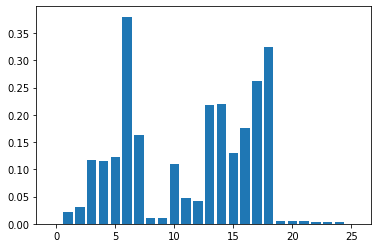

In [24]:
import matplotlib.pyplot as plt
plt.bar(y_pos, missing_data_df["ratio"])

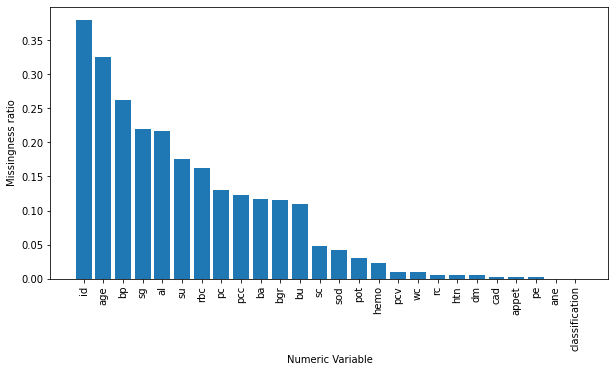

In [25]:
#Add this line to sort the graph

missing_data_df = missing_data_df.sort_values(by=["ratio"],ascending=False)

#plot it 
plt.figure(figsize=(10, 5))

# Create bars
plt.bar(y_pos, missing_data_df["ratio"])

# Create names on the x-axis
plt.xticks(y_pos, bars, color='black',rotation=90)
plt.yticks(color='black')
 
plt.xlabel('Numeric Variable') 
plt.ylabel('Missingness ratio')            
           
# Show graphic
plt.show()

In [26]:
#data.fillna('', inplace=True)
data = data.fillna(data.mean())
data.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [27]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [28]:
#check the unique values
data["rbc"].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

#### Standardization
1. Scaling data
2. Scaled and non-scaled data histograms

In [29]:
#Sample from the main dataframe
sample = data[["age","bp"]]

sample

,age,bp
0,48.0,80.0
1,7.0,50.0
2,62.0,80.0
3,48.0,70.0
4,51.0,80.0
...,...,...
395,55.0,80.0
396,42.0,70.0
397,12.0,80.0
398,17.0,60.0


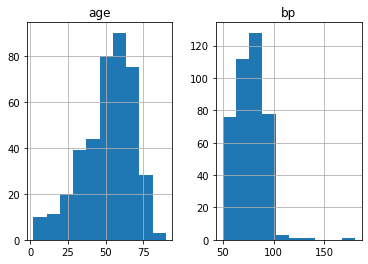

In [30]:
sample.hist()
plt.show()

In [31]:
# Scale data
from sklearn import preprocessing
sample_scaled = pd.DataFrame(preprocessing.scale(sample),columns=["age","bp"])

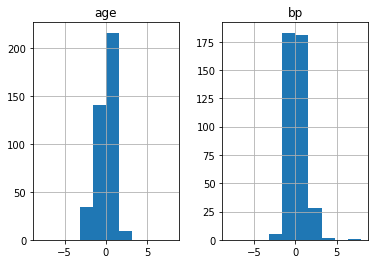

In [32]:
#try this now
sample_scaled.hist(range=[-8,8]);

### Filtering

In [33]:
data["classification"].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [34]:
data.loc[data["classification"] == "ckd\t"] = "ckd"

In [35]:
data["classification"].unique()

array(['ckd', 'notckd'], dtype=object)

In [36]:
data_ckd = data[data["classification"]=="ckd"]

In [37]:
data_ckd["classification"].unique()

array(['ckd'], dtype=object)

### 3. Univariate Analysis

1. Listing Types of Variables
2. Listing unique variables and plotting them
3. Create multiple plots with numeric variables


In [38]:
#load and fill missing numeric values with the mean
data = pd.read_csv('./kidney_disease.csv')
data = data.fillna(data.mean())
data = data.fillna("")

In [39]:
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [40]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

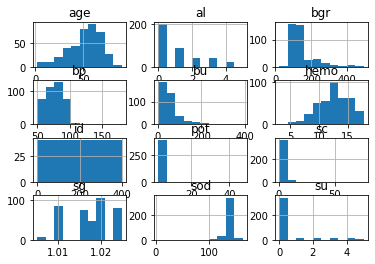

In [41]:
data.hist();

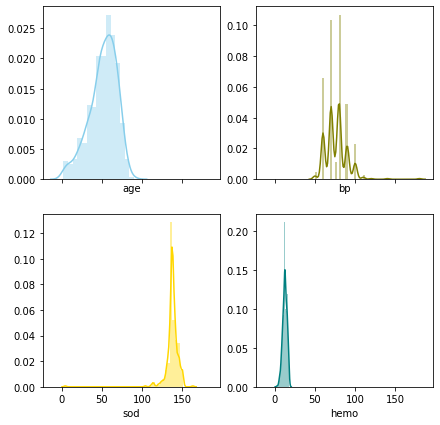

In [42]:
# library and data
import seaborn as sns
 
# plot
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( data["age"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["bp"] , color="olive", ax=axes[0, 1])
sns.distplot( data["sod"] , color="gold", ax=axes[1, 0])
sns.distplot( data["hemo"] , color="teal", ax=axes[1, 1])

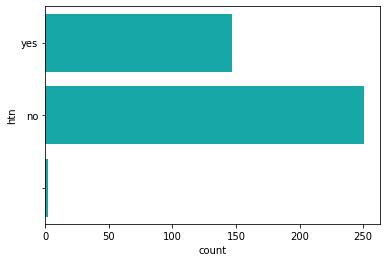

In [43]:
sns.countplot(y="htn", data=data, color="c");

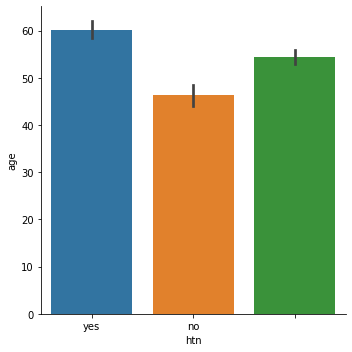

In [44]:
sns.catplot(x="htn", y="age",  kind="bar", data=data);

### 4. Segmented Univariate Analysis

In [45]:
data['classification'] = data['classification'].replace('ckd\t', 'ckd')
data['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [46]:
data["htn"].unique()
data["htn"].replace('', np.nan, inplace=True)


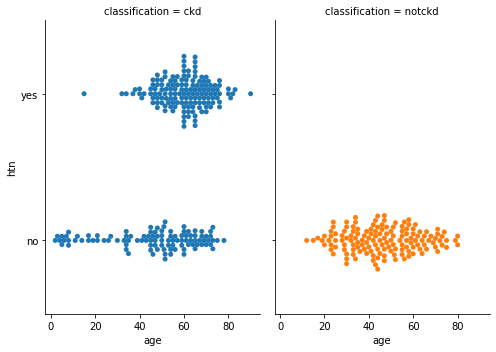

In [47]:
sns.catplot(x="age", y="htn", col="classification", hue="classification",
            aspect=.7,
            kind="swarm", data=data)

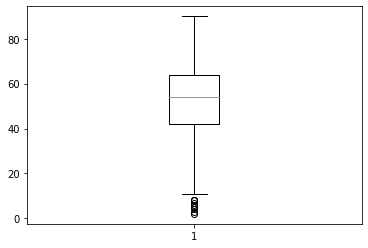

In [48]:
#numeric boxplot
#numeric
plt.boxplot(data["age"]);

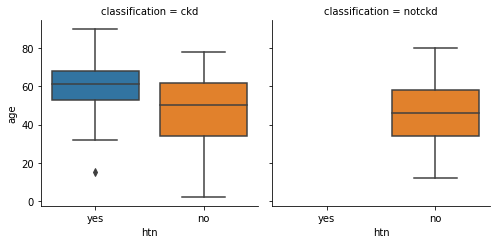

In [49]:
g = sns.catplot(x="htn", 
                y="age", 
                col="classification", #this is the segment
                kind="box", 
                height=3.5, 
                data=data)

### 5. Bivariate and Multivariate Analysis
1. Correlation matrix
2. Bivariate analysis on continuous variables
3. Bivariate analysis on categorical variables

In [50]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [51]:
data.head(5)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,,normal,notpresent,notpresent,...,38,6000,,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


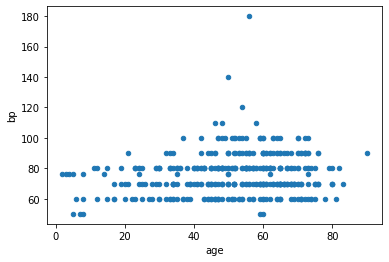

In [52]:
data.plot.scatter(x='age', y='bp')

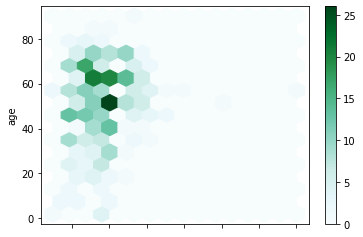

In [53]:
data.plot.hexbin(x='bp', y='age', gridsize=15)

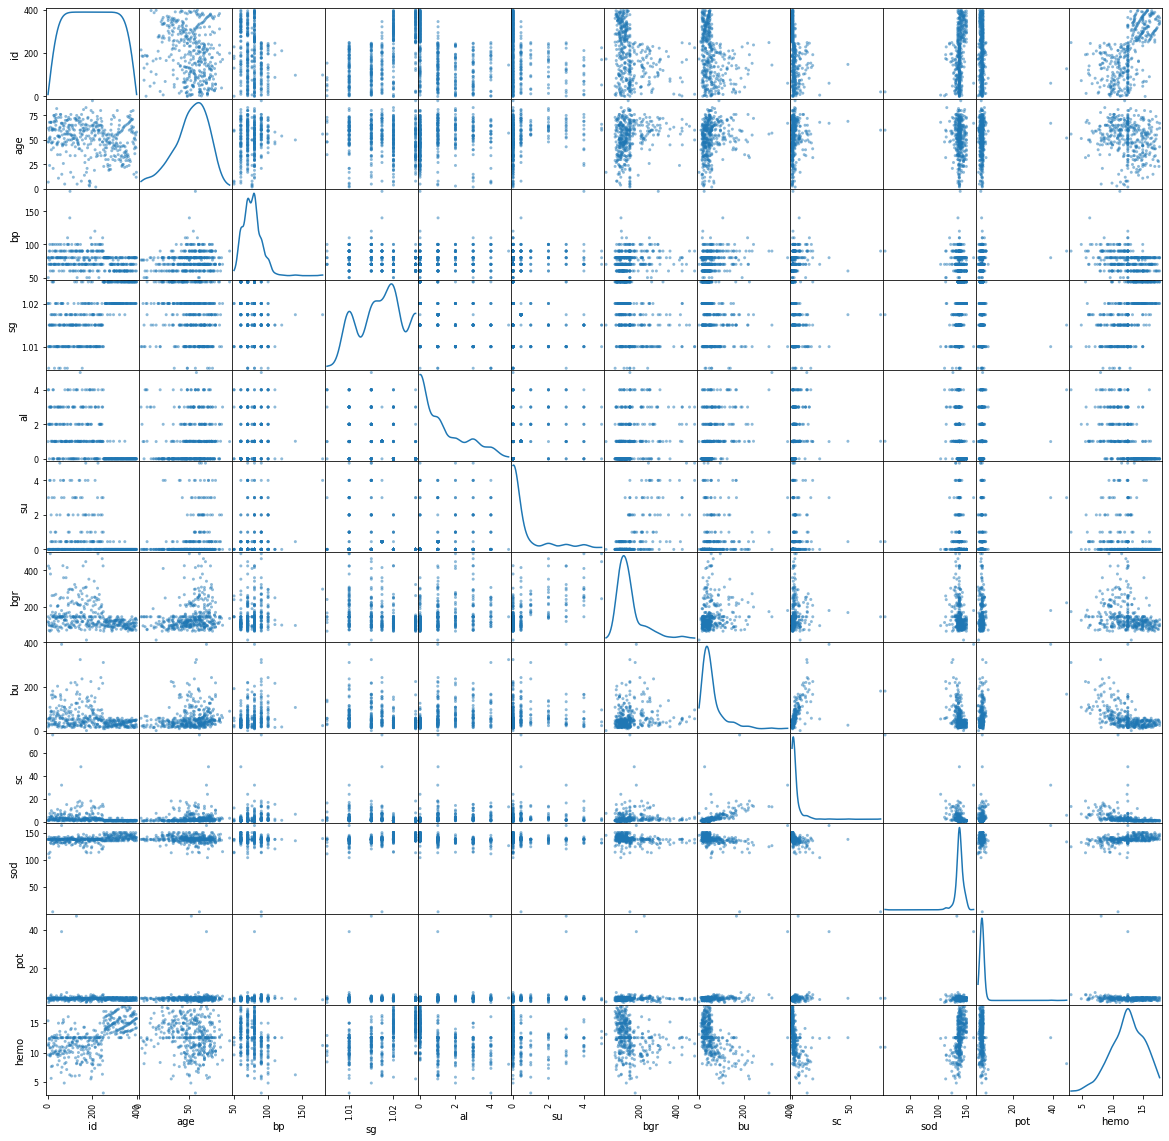

In [54]:
#scatter matrix
spd = pd.plotting.scatter_matrix(data, figsize=(20,20), diagonal="kde") ;

In [55]:
data.iloc[:, 1:25]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,,normal,notpresent,notpresent,121.000000,...,15.4,44,7800,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,,normal,notpresent,notpresent,148.036517,...,11.3,38,6000,,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,9.6,31,7500,,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,11.6,35,7300,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,15.7,47,6700,4.9,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,16.5,54,7800,6.2,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,15.8,49,6600,5.4,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,14.2,51,7200,5.9,no,no,no,good,no,no


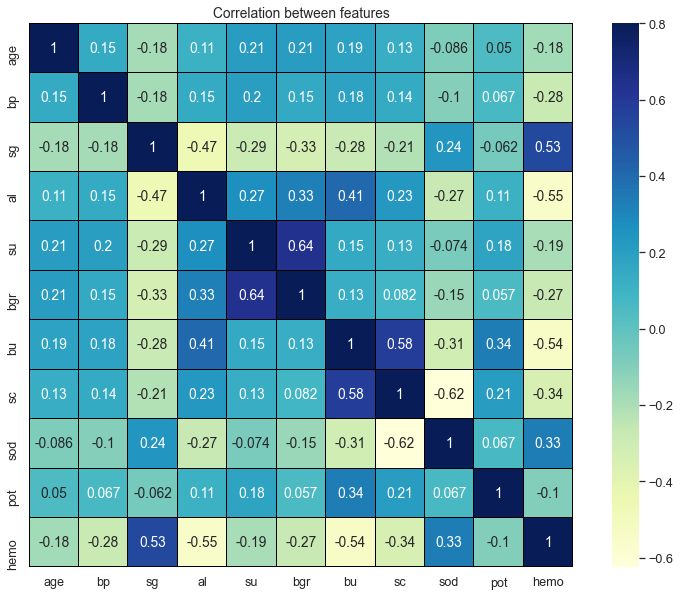

In [56]:
corr=data.iloc[:, 1:25].corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,
            annot=True,
            cmap='YlGnBu',
            linecolor="black")
plt.title('Correlation between features');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


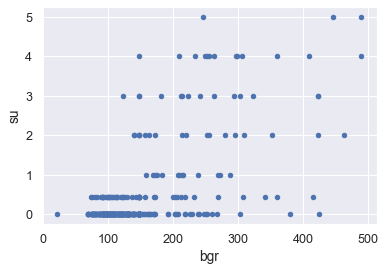

In [57]:
data.plot.scatter(x='bgr', y='su');

# COVID 19 India

In [58]:
#load the covid-19 india dataset
df = pd.read_csv('covid_19_india.csv')

#change the state column name
df = df.rename(columns={"State/UnionTerritory": "State"})


In [59]:
df

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
7781,7782,27/10/20,8:00 AM,Telengana,-,-,213466,1315,232671
7782,7783,27/10/20,8:00 AM,Tripura,-,-,28153,344,30293
7783,7784,27/10/20,8:00 AM,Uttarakhand,-,-,55663,1001,60744
7784,7785,27/10/20,8:00 AM,Uttar Pradesh,-,-,438521,6904,472077


In [60]:
df.columns


Index(['Sno', 'Date', 'Time', 'State', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')

In [61]:
df["State"].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***'], dtype=object)

In [62]:
df["State"].value_counts()


Kerala                                      272
Delhi                                       240
Rajasthan                                   239
Haryana                                     238
Uttar Pradesh                               238
Ladakh                                      235
Tamil Nadu                                  235
Jammu and Kashmir                           233
Maharashtra                                 233
Punjab                                      233
Karnataka                                   233
Andhra Pradesh                              230
Uttarakhand                                 227
Odisha                                      226
West Bengal                                 224
Puducherry                                  224
Chhattisgarh                                223
Chandigarh                                  223
Gujarat                                     222
Madhya Pradesh                              221
Himachal Pradesh                        

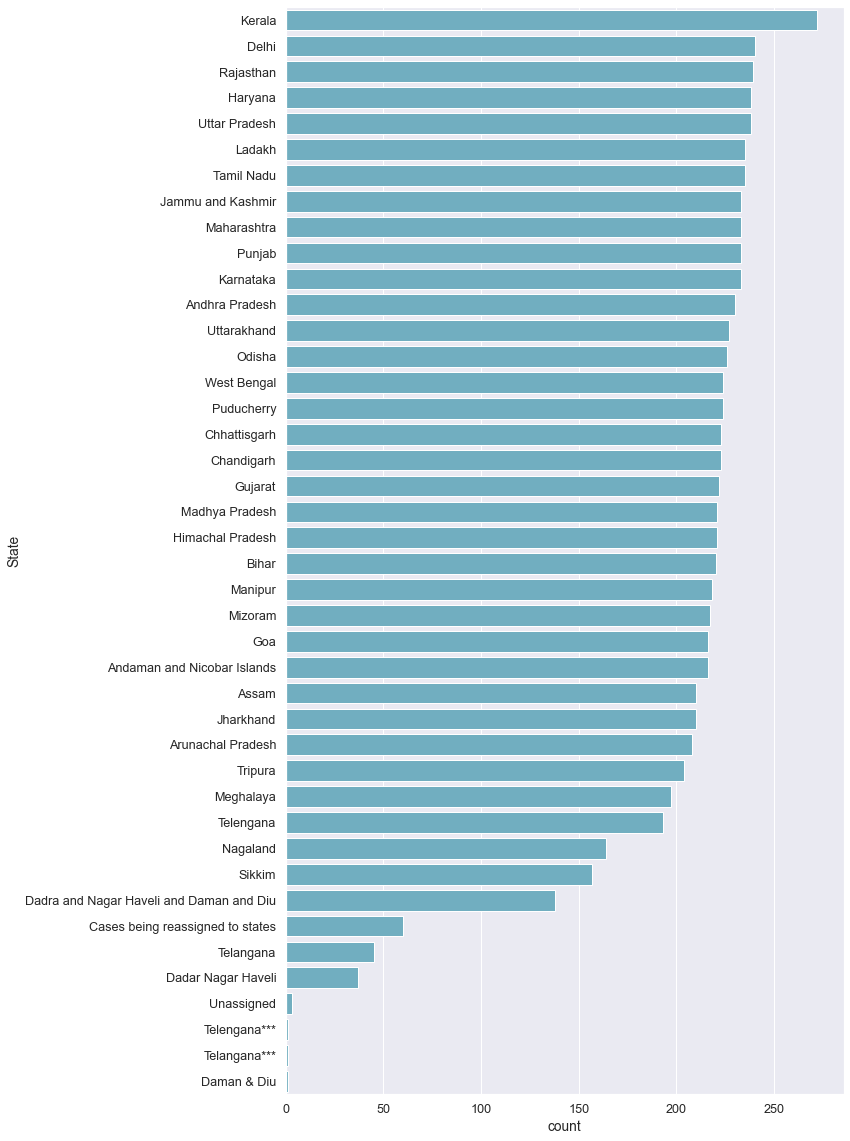

In [63]:
#plot the data counts per state
plt.figure(figsize=(10, 20))

#add order to order the plot
sns.countplot(y="State", data=df, color="c", order = df['State'].value_counts().index)

# Show graphic
plt.show()

In [64]:
#df_sample=df[df["State"]=="Kerala"]
df_sample = df

df_sample

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
7781,7782,27/10/20,8:00 AM,Telengana,-,-,213466,1315,232671
7782,7783,27/10/20,8:00 AM,Tripura,-,-,28153,344,30293
7783,7784,27/10/20,8:00 AM,Uttarakhand,-,-,55663,1001,60744
7784,7785,27/10/20,8:00 AM,Uttar Pradesh,-,-,438521,6904,472077


In [65]:
df_sample.dtypes

Sno                          int64
Date                        object
Time                        object
State                       object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [66]:
df_sample.index=df_sample['Date']
df_sample['Date'] = pd.to_datetime(df_sample['Date'],format='%d/%m/%y',)
df_sample.dtypes

Sno                                  int64
Date                        datetime64[ns]
Time                                object
State                               object
ConfirmedIndianNational             object
ConfirmedForeignNational            object
Cured                                int64
Deaths                               int64
Confirmed                            int64
dtype: object

In [67]:
df_sample

df_sample= df_sample.replace({'-': 0})

df_sample["ConfirmedIndianNational"] = df_sample["ConfirmedIndianNational"].astype(int)
df_sample["ConfirmedForeignNational"] = df_sample["ConfirmedForeignNational"].astype(int)

In [68]:
df_sample = df_sample[df_sample['Date'] < "2020-04-01"]

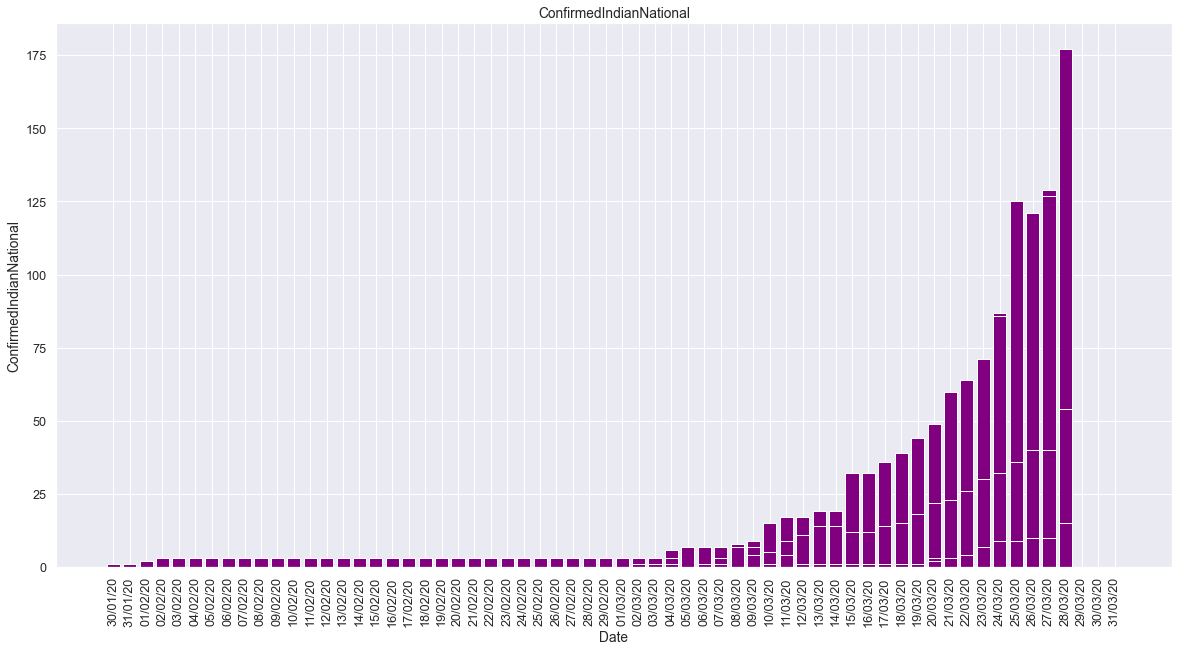

In [69]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.bar(df_sample.index.values,
        df_sample['ConfirmedIndianNational'],
              color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedIndianNational",
       title="ConfirmedIndianNational")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=90)

plt.show()


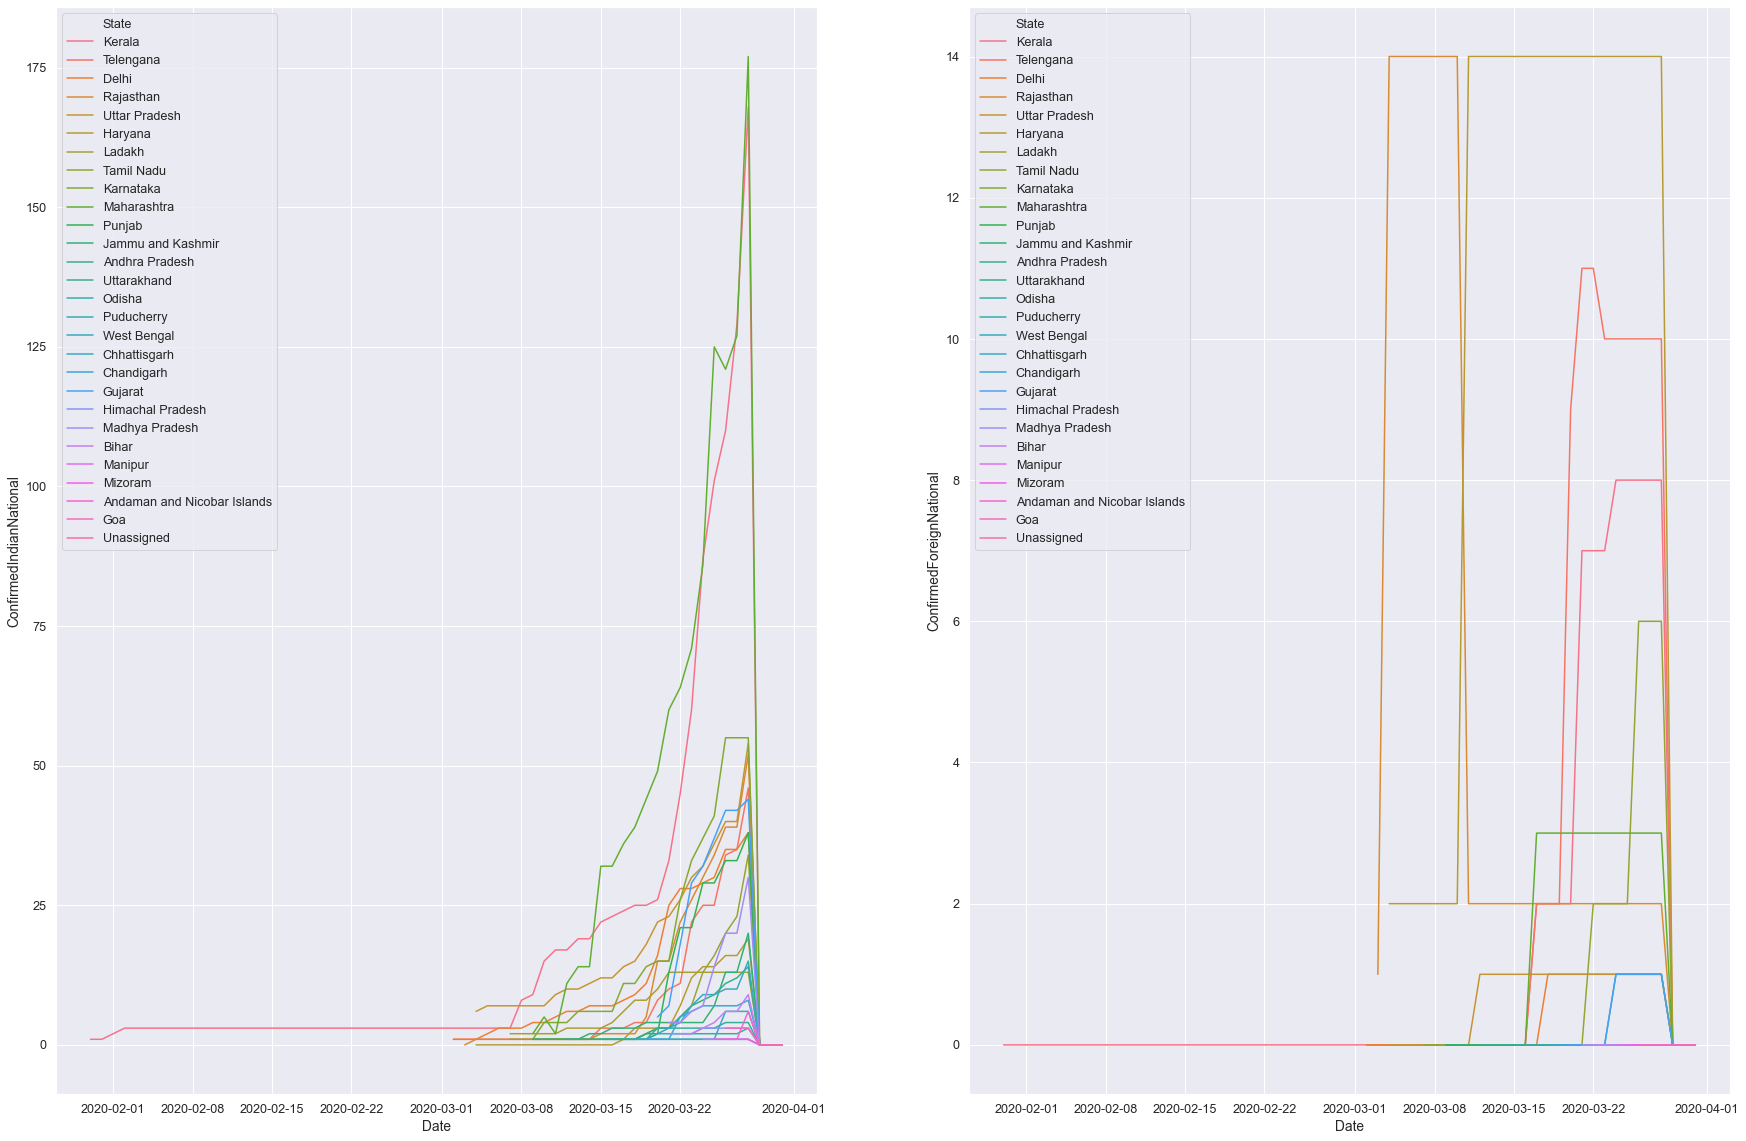

In [70]:
import seaborn as sns

# plot
f, axes = plt.subplots(1, 2, figsize=(30, 20), sharex=True)

# Add x-axis and y-axis
sns.lineplot(data=df_sample, x='Date', y='ConfirmedIndianNational', hue='State', ax=axes[0])
sns.lineplot(data=df_sample, x='Date', y='ConfirmedForeignNational', hue='State', ax=axes[1])

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()